<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=300, height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h3 style="text-align: center;"><b> Градиентный спуск. Линейные модели.</b></h3>

В этом ноутбуке мы попробуем реализовать свой градиентный спуск на основе модели линейной регрессии и сравним свою реализацию с 

In [65]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# func = lambda x: 0.34*x+13.7+np.random.normal(0, 7)

### Построение модели

Модель нашей линейной решрессии:

In [67]:
W = None
b = None

def mse(preds, y):
    return ((preds - y)**2).mean()

def solve_weights(X, y):
    global W, b
    
    N = X.shape[0]
    bias = np.ones((N, 1))
    X_b = np.append(bias, X, axis=1)
    
    W1 = np.linalg.inv(X_b.T@X_b)
    W2 = W1@X_b.T
    W_full = W2@y
    
    W = W_full[1:]
    b = np.array([W_full[0]])
    
def grad_descent(X, y, lr, num_iter=100):
    global W, b
    W = np.random.rand(X.shape[1])
    b = np.array(np.random.rand(1))
    
    losses = []
    
    N = X.shape[0]
    for iter_num in range(num_iter):
        preds = predict(X)
        losses.append(mse(preds, y))
        
        w_grad = np.zeros_like(W)
        b_grad = 0
        for sample, prediction, label in zip(X, preds, y):
            w_grad += 2 * (prediction - label) * sample
            b_grad += 2 * (prediction - label)
            
        W -= lr * w_grad
        b -= lr * b_grad
    return losses

def predict(X):
    global W, b
    return np.squeeze(X@W + b.reshape(-1, 1))

### Получение данных

In [68]:
func = lambda x: (0.34*x+13.7+np.random.normal(0, 7, size=x.shape))
X_train = np.random.random(100) * 150
y_train = func(X_train)

pd.DataFrame({'X': X_train, 'Y': y_train}).head()

,X,Y
0,116.953538,54.912809
1,130.670748,57.670667
2,2.302885,23.264037
3,91.654297,52.285684
4,5.133051,14.530361


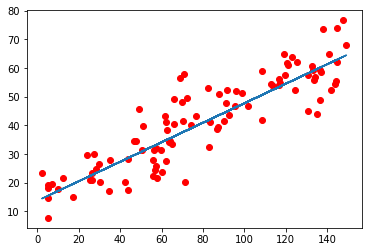

In [69]:
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.show()

In [70]:
# y_train = (y_train - y_train.mean()) / y_train.std()

### Решение с помощью линейной алгебры

In [71]:
solve_weights(X_train.reshape(-1, 1), y_train)

In [72]:
W, b

(array([ 0.33719049]), array([ 14.71001831]))

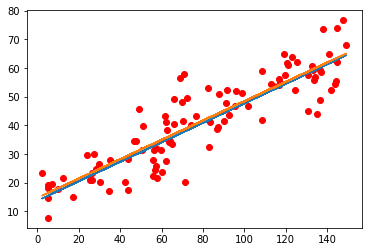

In [73]:
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1)@W + b.reshape(-1, 1)))
plt.show()

### Решение с помощью градиентного спуска

In [74]:
losses = grad_descent(X_train.reshape(-1, 1), y_train, 1e-9, 15000)

In [75]:
W, b

(array([ 0.47731479]), array([ 0.43230088]))

([<matplotlib.lines.Line2D at 0x7f60f8d8af28>], 98.372330117699136)

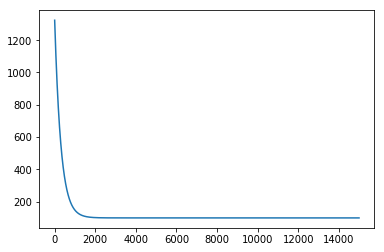

In [76]:
plt.plot(losses), losses[-1]

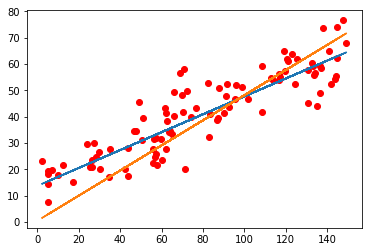

In [78]:
plt.scatter(X_train, y_train, c='r')
plt.plot(X_train, 0.34*X_train+13.7)
plt.plot(X_train, np.squeeze(X_train.reshape(-1, 1)@W + b.reshape(-1, 1)))
plt.show()

### Данные посложнее

In [79]:
df = pd.read_csv("data.csv")

In [80]:
df.head()

,Index,A1,A2,A3,A4,B
0,1,75,91,6,85,4815
1,2,6,48,48,48,234
2,3,5,60,24,40,160
3,4,74,48,8,86,4794
4,5,10,74,70,11,659


In [81]:
data, label = np.array(df)[:, 1:5], np.array(df)[:, 5]

In [82]:
label = (label-label.mean())/label.std()

### Решение с помощью линейной алгебры

In [83]:
solve_weights(data, label)

In [84]:
W, b

(array([ 0.00132885,  0.00264024,  0.00984324, -0.00301855]),
 array([-0.81880943]))

In [85]:
mse(predict(data), label)

0.608053802885831

### Решение с помощью градиентного спуска

In [86]:
losses = grad_descent(data, label, 1e-9, 500)

In [87]:
W, b

(array([-0.12728837,  0.0156983 ,  0.24675431,  0.20680033]),
 array([ 0.99130791]))

([<matplotlib.lines.Line2D at 0x7f60f9169908>], 369.05623860184164)

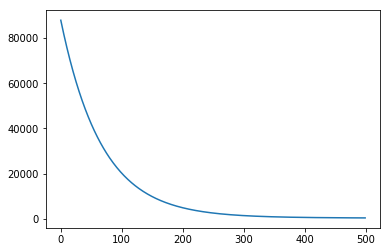

In [88]:
plt.plot(losses), losses[-1]